<a href="https://colab.research.google.com/github/rohanakut/Epilepsy-CNN/blob/main/Epilepsy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# **Data Processing**

In [ ]:
#Add all the imports here
import pywt
import os 
import scipy.signal,scipy.fft
from sklearn.model_selection import train_test_split
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model, Input
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import numpy as np
import torch

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

!pip install tensorflow_addons
import tensorflow_addons as tfa
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plot
from matplotlib.pyplot import figure
from matplotlib.backends.backend_agg import FigureCanvas
from matplotlib.figure import Figure
from tensorflow.keras.utils import to_categorical
from os import makedirs
!pip install h5py
from skimage.color import rgb2gray
from scipy.signal import convolve2d
from keras.models import load_model
from sklearn.metrics import accuracy_score
from scipy.special import softmax

**This step involves reading the data from text files and loading it in python usable lists**

In [ ]:
#Unzip all the 5 zip files of the data here. You should have 100 text files in each zip file
%cd /content/gdrive/MyDrive/input_data/F/
!unzip F.zip

%cd /content/gdrive/MyDrive/input_data/N/
!unzip N.zip

%cd /content/gdrive/MyDrive/input_data/O/
!unzip O.zip

%cd /content/gdrive/MyDrive/input_data/S/
!unzip S.zip

%cd /content/gdrive/MyDrive/input_data/Z/
!unzip Z.zip



/content/gdrive/MyDrive/input_data/F
unzip:  cannot find or open F.zip, F.zip.zip or F.zip.ZIP.
/content/gdrive/MyDrive/input_data/N
unzip:  cannot find or open N.zip, N.zip.zip or N.zip.ZIP.
/content/gdrive/MyDrive/input_data/O
unzip:  cannot find or open O.zip, O.zip.zip or O.zip.ZIP.
/content/gdrive/MyDrive/input_data/S
unzip:  cannot find or open S.zip, S.zip.zip or S.zip.ZIP.
/content/gdrive/MyDrive/input_data/Z
unzip:  cannot find or open Z.zip, Z.zip.zip or Z.zip.ZIP.


In [ ]:
#read all the zip files and copy each text file in the list named 'lines'. The list 'lines is a list of list. 
#Lines[0] will give us the content of the text file 1, lines[1] will give the content of text file 2 and so on
  
# Folder Path 
paths_dict = {
"pathZ" : "/content/gdrive/MyDrive/input_data/Z",
"pathO" : "/content/gdrive/MyDrive/input_data/O",
"pathN" : "/content/gdrive/MyDrive/input_data/N",
"pathF" : "/content/gdrive/MyDrive/input_data/F",
"pathS" : "/content/gdrive/MyDrive/input_data/S",
}

print(type(paths_dict))
  

# Read text File 

lines=[None]*500
i=0
def read_text_file(file_path): 
    with open(file_path, 'r') as f: 
        lines[i] = f.read().split('\n') 
        #print(lines[i])
  
# iterate through all file 

for key, value in paths_dict.items():
  print(value)
  os.chdir(value)
  for file in os.listdir():
    #print(i) 
    # Check whether file is in text format or not 
    if file.endswith(".txt") or file.endswith(".TXT"): 
        file_path = f"{value}/{file}"

  
        # call read text file function 
        read_text_file(file_path) 
        i+=1
print("All files loaded")

<class 'dict'>
/content/gdrive/MyDrive/input_data/Z
/content/gdrive/MyDrive/input_data/O
/content/gdrive/MyDrive/input_data/N
/content/gdrive/MyDrive/input_data/F
/content/gdrive/MyDrive/input_data/S
All files loaded


In [ ]:
# makedirs('models')

In [ ]:
print(lines[499])

['23', '144', '228', '260', '255', '218', '178', '126', '60', '6', '-47', '-90', '-143', '-181', '-221', '-264', '-305', '-346', '-406', '-506', '-565', '-474', '-232', '76', '309', '415', '484', '552', '594', '614', '578', '494', '400', '293', '192', '104', '26', '-22', '-32', '-46', '-64', '-102', '-159', '-233', '-304', '-311', '-226', '-115', '-6', '38', '65', '77', '69', '29', '-29', '-123', '-205', '-291', '-362', '-411', '-470', '-496', '-465', '-406', '-326', '-297', '-327', '-377', '-300', '-140', '113', '293', '384', '432', '438', '438', '450', '477', '482', '470', '420', '375', '334', '270', '178', '71', '-27', '-120', '-236', '-383', '-542', '-633', '-687', '-503', '-250', '102', '410', '599', '704', '723', '688', '622', '549', '477', '426', '394', '377', '354', '311', '233', '136', '28', '-97', '-235', '-356', '-440', '-515', '-538', '-432', '-299', '-73', '97', '228', '328', '369', '365', '339', '309', '292', '269', '240', '200', '144', '84', '26', '-33', '-110', '-203', 

In [ ]:
## This code converts all the readings copied from texts to float values. The initial values were strings and hence the conversion was necessary


for j in range(0,len(lines)):
  lines[j].pop()
  lines[j] = [float(i) for i in lines[j]]

In [ ]:
print(len(lines[0]))
print(lines[499])

4097
[23.0, 144.0, 228.0, 260.0, 255.0, 218.0, 178.0, 126.0, 60.0, 6.0, -47.0, -90.0, -143.0, -181.0, -221.0, -264.0, -305.0, -346.0, -406.0, -506.0, -565.0, -474.0, -232.0, 76.0, 309.0, 415.0, 484.0, 552.0, 594.0, 614.0, 578.0, 494.0, 400.0, 293.0, 192.0, 104.0, 26.0, -22.0, -32.0, -46.0, -64.0, -102.0, -159.0, -233.0, -304.0, -311.0, -226.0, -115.0, -6.0, 38.0, 65.0, 77.0, 69.0, 29.0, -29.0, -123.0, -205.0, -291.0, -362.0, -411.0, -470.0, -496.0, -465.0, -406.0, -326.0, -297.0, -327.0, -377.0, -300.0, -140.0, 113.0, 293.0, 384.0, 432.0, 438.0, 438.0, 450.0, 477.0, 482.0, 470.0, 420.0, 375.0, 334.0, 270.0, 178.0, 71.0, -27.0, -120.0, -236.0, -383.0, -542.0, -633.0, -687.0, -503.0, -250.0, 102.0, 410.0, 599.0, 704.0, 723.0, 688.0, 622.0, 549.0, 477.0, 426.0, 394.0, 377.0, 354.0, 311.0, 233.0, 136.0, 28.0, -97.0, -235.0, -356.0, -440.0, -515.0, -538.0, -432.0, -299.0, -73.0, 97.0, 228.0, 328.0, 369.0, 365.0, 339.0, 309.0, 292.0, 269.0, 240.0, 200.0, 144.0, 84.0, 26.0, -33.0, -110.0, -20

**Now the entire data has been read from the text files and is present in "lines" list. The lines list is a list of list where [0:99] represent file F, [100:199] represent file N and so on. Now we can use this list "lines" for pre-processing**

**This step uses Wavelet Transforms. The description is mentioned in the code block**

In [ ]:
"""
This code does the wavelet transform of the text file. If you notice the d1 and d2 values that are obtained from wavelet transform are eliminated. 
This is because that is the noise in the signal.
This procedure has been done in multiple papers like : 
Hence we have done the same
"""


d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
a5 = []
coeffs = []
output_wavelet = []
for i in range(0,len(lines)):
  coeffs = pywt.wavedec(lines[i],'sym20',level=5)
  a5,d5,d4,d3,d2,d1 = coeffs
  a5 = a5.tolist()
  d5 = d5.tolist()
  d4 = d4.tolist()
  d3 = d3.tolist()
  ##removing the d2 and d1 as it is noise
  a5 = a5+d5+d4+d3   
  output_wavelet.append(a5)
print("The wavelet output for one signal is: ",(output_wavelet[0]))
print("And the number of wavelets generated per signal is: ",len(output_wavelet[0]))

The wavelet output for one signal is:  [209.16021770570927, 176.89379832698475, 191.9107368955327, 186.07159201905128, 197.56484350562144, 194.05448718094905, 186.19515711699316, 189.8847411628111, 187.9382669422124, 185.76307214717292, 187.56036628662588, 188.0402209815318, 189.29978902685045, 186.39934712267765, 201.18755892310978, 188.98670612440745, 187.72882070598507, 191.18788893852974, 193.438794337631, 149.32420479401884, 21.332179810966416, 156.06309224983966, -77.48435787687912, 127.06372724808894, -2.307313470954818, 146.74664187603628, -136.93323302615215, -97.25272431833557, 157.4001587515972, 197.50840426989834, -42.40769830095273, 141.45047763984678, -76.30123671879942, 200.48751163205375, 28.297839859254598, 68.6781018537945, 44.14918827794505, -103.87935166396124, -457.69279314600607, -125.35634505821474, 75.50837328595983, -171.68122616678318, -17.099263543635864, 87.15579358948209, 348.8932857244793, 206.20202304506813, 104.75357708008872, 281.87888025054593, 186.048

In [ ]:
"""
This code converts the text input to fft welch transform. 
The output of dummy[0] is to be ignored as mentioned in docs of scipy.
"""
output_welch = []
for i in range(0,len(lines)):
  coeffs = (scipy.signal.welch(lines[i],  window='hann', axis = -1,  average='mean',noverlap=2))
  output_welch.append(list(coeffs[1]))

print(len(output_welch[1]))
print(coeffs[0])

129
[0.         0.00390625 0.0078125  0.01171875 0.015625   0.01953125
 0.0234375  0.02734375 0.03125    0.03515625 0.0390625  0.04296875
 0.046875   0.05078125 0.0546875  0.05859375 0.0625     0.06640625
 0.0703125  0.07421875 0.078125   0.08203125 0.0859375  0.08984375
 0.09375    0.09765625 0.1015625  0.10546875 0.109375   0.11328125
 0.1171875  0.12109375 0.125      0.12890625 0.1328125  0.13671875
 0.140625   0.14453125 0.1484375  0.15234375 0.15625    0.16015625
 0.1640625  0.16796875 0.171875   0.17578125 0.1796875  0.18359375
 0.1875     0.19140625 0.1953125  0.19921875 0.203125   0.20703125
 0.2109375  0.21484375 0.21875    0.22265625 0.2265625  0.23046875
 0.234375   0.23828125 0.2421875  0.24609375 0.25       0.25390625
 0.2578125  0.26171875 0.265625   0.26953125 0.2734375  0.27734375
 0.28125    0.28515625 0.2890625  0.29296875 0.296875   0.30078125
 0.3046875  0.30859375 0.3125     0.31640625 0.3203125  0.32421875
 0.328125   0.33203125 0.3359375  0.33984375 0.34375    0.

In [ ]:
"""
This code takes the FFT of the signal. The FFT has 2 values(a+jb), ie the real and imaginary parts.
We take the magnitude of the values and then pass these values to the Deep learning models
DO NOT USE THIS CODE. TO BE DECIDED IF THE CODE IS TO BE USED IN FUTURE
"""
x = scipy.fft.fft(lines)
print(len(x[0]))

4097


**Now we have 3 types of input**
1. **Pure input signal - collected in list "lines"**
2. **Wavelet Transformed and cleaned signal - collected in list "output_wavelet"**
3. **Weltch Transformed signal - collected in list "output_welch"**

**Now we have to just give these signals to Deep Learning models and test their performance** 

In [ ]:
batch_size = 10
num_classes = 3
epochs = 12

In [ ]:
  y1 = [0]*200
  y2 = [1]*200
  y3 =  [2]*100
  y = y1 + y2 + y3 #y is a global variable

In [ ]:
"""
Now we have done the preprocessing and we are just passing the preprocessed signals to the Deep Learning model to check their performance.
"""
def process_data(tf_type):
  y1 = [0]*200
  y2 = [1]*200
  y3 = [2]*100
  x_a = [None]*200
  x_b = [None]*200
  x_c = [None]*100

  y = y1+y2+y3
  if tf_type == 'lines': x = lines
  elif tf_type == 'wavelet': x = output_wavelet
  else: x = output_welch
  #x = output_wavelet
  # x=output_welch
  #print((x[450]))
  # for i in range(0,200):
  #   x_a[i] = x[i]
  #   x_b[i] = x[i+200]
  #   if i <100:
  #     x_c[i] = x[i+400]
  #     x_c[i].append(2)
  #   x_a[i].append(0)
  #   x_b[i].append(1)
  #  # print(len(x[i]))

  # print(x_c[98])
  # print(x_b[150])
  # print(x_a[100])

  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  print(len(x_train),len(x_test))
  x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
  print(len(x_train[0]),len(x_val),len(x_test),len(y_train),len(y_test))
  return x_train, x_test, x_val, y_train, y_test, y_val


In [ ]:

def get_data(tf_type):
  if (tf_type == 'lines'): num_eg = 4097
  elif tf_type == 'wavelet': num_eg = 1168
  else: num_eg = 128
  # input image dimensions
  img_rows, img_cols = 28, 28
  
  x_train, x_test, x_val, y_train, y_test, y_val = process_data(tf_type)
  x_train = np.array(x_train)
  x_test = np.array(x_test)
  x_val = np.array(x_val)

  x_train = x_train.reshape(360,num_eg,1,1)
  x_test = x_test.reshape(100,num_eg,1,1)
  x_val = x_val.reshape(40,num_eg,1,1)

  y_train = np.asarray(y_train)
  y_test = np.asarray(y_test)
  y_val = np.asarray(y_val)
  print(len(y_train))
  print('x_train shape:', x_train.shape)
  print(x_train.shape[0], 'train samples')
  print(x_test.shape[0], 'test samples')

  # convert class vectors to binary class matrices
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  y_val = keras.utils.to_categorical(y_val, num_classes)
  print(type(x_train))
  print(len(y_train))
  return x_train, x_test, x_val, y_train, y_test, y_val

In [ ]:
x_train, x_test, x_val, y_train, y_test, y_val = get_data('lines')

400 100
4097 40 100 360 100
360
x_train shape: (360, 4097, 1, 1)
360 train samples
100 test samples
<class 'numpy.ndarray'>
360


#CNN

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 1),
                 activation='relu',
                 input_shape = (4097,1,1)))
model.add(Conv2D(34, (4, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 1), activation='relu'))
model.add(Conv2D(64, (4, 1), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(124, (3, 1), activation='relu'))
model.add(Conv2D(124, (4, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,1)))
model.add(Flatten())
model.add(Dense(550, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(25, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# Fit the model
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

#es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
model = load_model('models/model_CNN1'+"max_accuracy" + '.h5')

max_accuracy = 0.85
n_epochs = 500
for i in range(n_epochs):
	# fit model for a single epoch
  print("Epoch "+ str(i))
  history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))#,callbacks=[es])
	# check if we should save the model
  x = history.history['val_accuracy']
  x = float(x[0])
  if  x > max_accuracy:
    print("Write to File")
    model.save('models/model_CNN1'+"max_accuracy" + '.h5')
    max_accuracy = x

scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 0
36/36 [==============================] - 4s 83ms/step - loss: 0.0261 - accuracy: 0.9972 - val_loss: 0.3486 - val_accuracy: 0.9000
Write to File
Epoch 1
36/36 [==============================] - 3s 74ms/step - loss: 0.0387 - accuracy: 0.9861 - val_loss: 0.3382 - val_accuracy: 0.8800
Epoch 2
36/36 [==============================] - 3s 74ms/step - loss: 0.0446 - accuracy: 0.9806 - val_loss: 0.3341 - val_accuracy: 0.8800
Epoch 3
36/36 [==============================] - 3s 75ms/step - loss: 0.0292 - accuracy: 0.9944 - val_loss: 0.3295 - val_accuracy: 0.8800
Epoch 4
36/36 [==============================] - 3s 77ms/step - loss: 0.0269 - accuracy: 0.9972 - val_loss: 0.3277 - val_accuracy: 0.8800
Epoch 5
36/36 [==============================] - 3s 76ms/step - loss: 0.0281 - accuracy: 0.9944 - val_loss: 0.3237 - val_accuracy: 0.8800
Epoch 6
36/36 [==============================] - 3s 77ms/step - loss: 0.0377 - accuracy: 0.9861 - val_loss: 0.3068 - val_accuracy: 0.8800
Epoch 7
36/36 [=====

KeyboardInterrupt: ignored

In [ ]:
CNN_model = model

#RNN

In [ ]:
model = keras.Sequential()

# Add a layers.LSTM layer with 128 internal units.
model.add(layers.Bidirectional(layers.LSTM(128, input_shape=(x_train.shape[1:]), return_sequences=True, activation= 'tanh')))
# model.add(layers.Dropout(0.1))
# model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation= 'tanh')))
# model.add(layers.Dropout(0.1))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation= 'tanh')))
model.add(layers.Dropout(0.2))
# model.add(layers.Bidirectional(layers.SimpleRNN(128, return_sequences=True, activation= 'tanh')))
# model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation= 'tanh')))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True, activation= 'tanh')))
model.add(layers.Dropout(0.2))
# model.add(layers.Bidirectional(layers.SimpleRNN(128,return_sequences=True, activation= 'tanh')))
# model.add(layers.LeakyReLU(0.1))
# model.add(layers.Bidirectional(layers.LSTM(128,return_sequences=True, activation= 'tanh')))
model.add(layers.Bidirectional(layers.LSTM(128, activation= 'tanh')))

model.add(layers.Dropout(0.2))
# model.add(layers.Dense(64, activation= 'relu'))
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation= 'relu'))
model.add(layers.Dense(3, activation= 'softmax'))



In [ ]:
# opt = tfa.optimizers.RectifiedAdam()
opt = tf.keras.optimizers.RMSprop(
    learning_rate=0.001,
    rho=0.9,
    momentum=0.0008,
    epsilon=1e-07,
    centered=False,
    name="RMSprop")
# tf.keras.optimizers.RA
# (learning_rate=1e-3)
# (learning_rate=1e-3,decay = 1e-5)
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
model.compile(loss='categorical_crossentropy'
, optimizer = opt,
metrics = ['accuracy'])
RNN_model = model

n_epochs = 50
max_accuracy = 0.85
for i in range(n_epochs):
  	# check if we should save the model
  print("Epoch "+ str(i))
	# fit model for a single epoch
  history = model.fit(x_train.squeeze(3), y_train,
          batch_size=batch_size,
          epochs=1,
          verbose=1,
          validation_data=(x_test.squeeze(3), y_test), callbacks=[es])

	# check if we should save the model
  x = history.history['val_accuracy']
  x = float(x[0])
  print(x)
  if  x > max_accuracy:
    print("Write File")
    model.save('models/model_RNN1'+"max_accuracy" + '.h5')
    max_accuracy = x

#_______________________________________________________________________________
#Regular Run, here we are not saving the model
# history = model.fit(x_train, y_train, epochs = 5, validation_data=(x_test, y_test), callbacks=[es])
# model.summary()

# # plot history
# plot.plot(history.history['loss'], label='train')
# plot.plot(history.history['val_loss'], label='test')
# plot.legend()
# plot.show()


Epoch 0
36/36 [==============================] - 168s 5s/step - loss: 1.0809e-05 - accuracy: 1.0000 - val_loss: 1.0723 - val_accuracy: 0.8900
0.8899999856948853
Epoch 1
36/36 [==============================] - 159s 4s/step - loss: 9.9418e-06 - accuracy: 1.0000 - val_loss: 1.0956 - val_accuracy: 0.8800
0.8799999952316284
Epoch 2
36/36 [==============================] - 159s 4s/step - loss: 6.2956e-06 - accuracy: 1.0000 - val_loss: 1.1107 - val_accuracy: 0.8800
0.8799999952316284


In [ ]:
RNN_model = model

In [ ]:
RNN_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_8 (Bidirection (10, 4097, 256)           133120    
_________________________________________________________________
bidirectional_9 (Bidirection (10, 4097, 256)           394240    
_________________________________________________________________
dropout_10 (Dropout)         (10, 4097, 256)           0         
_________________________________________________________________
bidirectional_10 (Bidirectio (10, 4097, 256)           394240    
_________________________________________________________________
dropout_11 (Dropout)         (10, 4097, 256)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (10, 256)                 394240    
_________________________________________________________________
dropout_12 (Dropout)         (10, 256)                

#Spectogram

In [ ]:
from PIL import Image, ImageOps
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import torch.nn.functional as F
import keras
from keras import layers

In [ ]:
def create_spectogram_dataset(arrs, r_type):
  """
  arrs: Data to convert to spectogram 
  r_type: type of data you want to return. 
  Options are: 
    1. 'Image' for Pillow Image
    2. 'numpy' for Numpy Array
  """
  spectogram_dataset = []
  arr = np.array(arrs)
  print(type(arr))
  arr = arr.flatten()
  for i in range(0, len(arr), 4097):
    fig = plot.Figure(figsize=(12,10))
    canvas = FigureCanvas(fig)
    ax = fig.add_subplot(212)
    powerSpectrum, freqenciesFound, time, imageAxis = ax.specgram(arr[i:4097+i], Fs=128.0, cmap=r_type)
    ax.set_xlabel('Time')
    ax.set_label('Frequency')
    canvas.draw()
    X = np.array(canvas.renderer.buffer_rgba())  # grab the pixel buffer and dump it into a numpy array
    X = (Image.fromarray(X, 'RGBA').crop((85, 382, 780, 650)))
    if r_type != 'binary': pass#X = np.asarray(Image.fromarray(X_arr, 'RGB').crop((85, 382, 780, 650)))
    else: 
      X = ImageOps.grayscale(X)
    spectogram_dataset.append(np.array(X))
  return spectogram_dataset

In [ ]:
spectogram_dataset = create_spectogram_dataset(lines,"binary")

<class 'numpy.ndarray'>


In [ ]:
spectogram_dataset_numpy = create_spectogram_dataset(lines ,"numpy")

<class 'numpy.ndarray'>


In [ ]:
Image.fromarray(spectogram_dataset_numpy[480]).crop((85, 382, 780, 650))

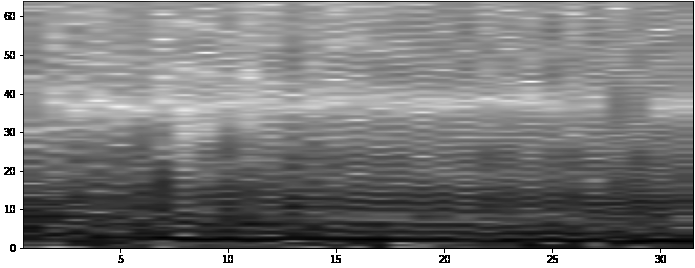

In [ ]:
Image.fromarray(spectogram_dataset[480])

In [ ]:
spectogram_dataset[480].shape

(268, 695)

In [ ]:
input_img = keras.Input(shape=(186260,))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(186260, activation='sigmoid')(decoded)

In [ ]:
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
2/2 [==============================] - 1s 337ms/step - loss: -9556.0654 - val_loss: -113120.3281
Epoch 2/100
2/2 [==============================] - 0s 170ms/step - loss: -170607.2969 - val_loss: -571530.2500
Epoch 3/100
2/2 [==============================] - 0s 167ms/step - loss: -720841.8750 - val_loss: -1610438.3750
Epoch 4/100
2/2 [==============================] - 0s 176ms/step - loss: -1911640.7500 - val_loss: -3604787.2500
Epoch 5/100
2/2 [==============================] - 0s 165ms/step - loss: -4153802.5000 - val_loss: -7043791.0000
Epoch 6/100
2/2 [==============================] - 0s 161ms/step - loss: -7953262.5000 - val_loss: -12652265.0000
Epoch 7/100
2/2 [==============================] - 0s 167ms/step - loss: -14120348.0000 - val_loss: -21390510.0000
Epoch 8/100
2/2 [==============================] - 0s 167ms/step - loss: -23629074.0000 - val_loss: -34637192.0000
Epoch 9/100
2/2 [==============================] - 0s 164ms/step - loss: -38084632.0000 - val_loss

KeyboardInterrupt: ignored

In [ ]:
spectogram_dataset[480].shape

(268, 695, 3)

In [ ]:
spectrogram_dataset = np.array(spectogram_dataset)

In [ ]:
type(spectrogram_dataset)

numpy.ndarray

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/ 

In [ ]:
# spectrogram_dataset_enc = []
for i,v in enumerate(spectogram_dataset):
  spectogram_dataset[i] = spectogram_dataset[i][:,:694,:]
  # spectrogram_dataset_enc.append(np.reshape(spectogram_dataset[i], (268,694,1)))

In [ ]:
spectogram_dataset[490].shape

(268, 694, 3)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(spectogram_dataset, y)
(x_train) = np.array(x_train)
x_test = np.array(x_test)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.

In [ ]:
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:


input_img = keras.Input(shape=(268, 694, 3))

#1
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
#2
x = layers.MaxPooling2D((2, 2), padding='same')(x)
#3
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
#4
x = layers.MaxPooling2D((2, 2), padding='same')(x)
#5
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)

x = layers.MaxPooling2D((2, 2), padding='same')(x)
#5
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
#6
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(8, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)

x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.ZeroPadding2D(padding=(4, 1))(x)
decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [ ]:
# model = keras.Sequential()
input_img = keras.Input(shape=(268, 694, 3))
x =(layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))(input_img)
x =(layers.BatchNormalization())(x)     # 32x32x32
x =(layers.Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))(x)      # 16x16x32
x =(layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))(x)     # 16x16x32
x =(layers.BatchNormalization())(x)      # 16x16x32
x =(layers.Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))(x) 
x =(layers.Conv2D(8, kernel_size=3, strides=1, padding='same', activation='relu'))(x) 
x =(layers.BatchNormalization())(x)      # 16x16x32
x =(layers.Conv2D(1, kernel_size=3, strides=2, padding='same', activation='relu'))(x) 
x =(layers.Conv2D(1, kernel_size=3, strides=1, padding='same', activation='relu'))(x) 
x =(layers.BatchNormalization())(x)      # 16x16x32
x =(layers.Conv2D(1, kernel_size=3, strides=2, padding='same', activation='relu'))(x) 
x =(layers.Conv2D(1, kernel_size=3, strides=1, padding='same', activation='relu'))(x)
encoded =(layers.BatchNormalization())(x)      # 16x16x32


x =(layers.UpSampling2D())(encoded)
x =(layers.Conv2D(16, kernel_size=3, strides=1, padding='same', activation='relu'))(x)       # 32x32x32
x =(layers.BatchNormalization())(x) 
x =(layers.UpSampling2D())(x) 

x =(layers.Conv2D(16, kernel_size=3, strides=1, padding='same', activation='relu'))(x)       # 32x32x32
x =(layers.BatchNormalization())(x) 
x =(layers.UpSampling2D())(x) 

x =(layers.Conv2D(32, kernel_size=(3,6), strides=1, activation='relu'))(x)       # 32x32x32
x =(layers.UpSampling2D())(x) 
# x = tf.keras.layers.ZeroPadding2D(padding=(0, 1))(x)
x =(layers.Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))(x)    # 32x32x3
decoded =(layers.BatchNormalization())(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')
autoencoder.summary()

Model: "model_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        [(None, 268, 694, 1)]     0         
_________________________________________________________________
conv2d_151 (Conv2D)          (None, 268, 694, 32)      320       
_________________________________________________________________
batch_normalization_243 (Bat (None, 268, 694, 32)      128       
_________________________________________________________________
conv2d_152 (Conv2D)          (None, 134, 347, 32)      9248      
_________________________________________________________________
conv2d_153 (Conv2D)          (None, 134, 347, 32)      9248      
_________________________________________________________________
batch_normalization_244 (Bat (None, 134, 347, 32)      128       
_________________________________________________________________
conv2d_154 (Conv2D)          (None, 67, 174, 8)        231

In [ ]:
# model = keras.Sequential()
input_img = keras.Input(shape=(268, 694, 3))
x =(layers.Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))(input_img)
x =(layers.BatchNormalization())(x) 
x = (Conv2D(32, kernel_size=3, strides=2, padding='same', activation='relu'))(x)       # 16x16x32
x = (Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))(x)
x = (BatchNormalization())(x)         # 16x16x32
x = (Conv2D(16, kernel_size=3, strides=1, padding='same', activation='relu'))(x) 
x = (Conv2D(8, kernel_size=3, strides=1, padding='same', activation='relu'))(x)
x =(BatchNormalization())(x)   
x = (Conv2D(3, kernel_size=3, strides=1, padding='same', activation='relu'))(x) 
encoded = (BatchNormalization())(x)      # 16x16x32
x = (layers.UpSampling2D())(encoded) 
x = (Conv2D(32, kernel_size=3, strides=1, padding='same', activation='relu'))(x)      # 32x32x32
x = (BatchNormalization())(x) 
decoded = (Conv2D(3,  kernel_size=1, strides=1, padding='same', activation='sigmoid'))(x)    # 32x32x3

model = keras.Model(input_img, decoded)
model.compile(optimizer='adam', metrics=['accuracy'], loss='binary_crossentropy')
model.summary()

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        [(None, 268, 694, 3)]     0         
_________________________________________________________________
conv2d_180 (Conv2D)          (None, 268, 694, 32)      896       
_________________________________________________________________
batch_normalization_294 (Bat (None, 268, 694, 32)      128       
_________________________________________________________________
conv2d_181 (Conv2D)          (None, 134, 347, 32)      9248      
_________________________________________________________________
conv2d_182 (Conv2D)          (None, 134, 347, 32)      9248      
_________________________________________________________________
batch_normalization_295 (Bat (None, 134, 347, 32)      128       
_________________________________________________________________
conv2d_183 (Conv2D)          (None, 134, 347, 16)      462

In [ ]:
from keras.callbacks import TensorBoard

model.fit(x_train, x_train,
                epochs=10,
                batch_size=30,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/10
13/13 [==============================] - 12s 900ms/step - loss: -837.5942 - accuracy: 0.5935 - val_loss: -821.4323 - val_accuracy: 0.5384
Epoch 2/10
13/13 [==============================] - 11s 834ms/step - loss: -915.7814 - accuracy: 0.5971 - val_loss: -922.6027 - val_accuracy: 0.5371
Epoch 3/10
13/13 [==============================] - 11s 856ms/step - loss: -997.4366 - accuracy: 0.6071 - val_loss: -1003.7339 - val_accuracy: 0.5507
Epoch 4/10
13/13 [==============================] - 11s 858ms/step - loss: -1084.3876 - accuracy: 0.6245 - val_loss: -1100.0521 - val_accuracy: 0.5667
Epoch 5/10
13/13 [==============================] - 11s 838ms/step - loss: -1175.4061 - accuracy: 0.6291 - val_loss: -1184.8229 - val_accuracy: 0.5769
Epoch 6/10
13/13 [==============================] - 11s 856ms/step - loss: -1269.6979 - accuracy: 0.6326 - val_loss: -1273.2935 - val_accuracy: 0.5914
Epoch 7/10
13/13 [==============================] - 11s 857ms/step - loss: -1365.7819 - accuracy: 0

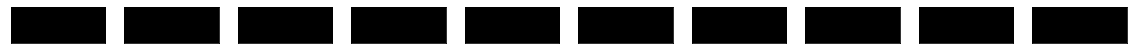

In [ ]:
encoder = keras.Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
# plot.imshow(encoded_imgs[0].reshape((34, 87*8)).T)
# plot.show()
# encoded_imgs[0].shape
n = 10

plot.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plot.subplot(1, n, i)
    plot.imshow(encoded_imgs[i].reshape((44, 17)).T)
    plot.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plot.show()

In [ ]:
encoded_imgs[1].shape

(17, 44, 1)

In [ ]:
encoder = keras.Model(input_img, encoded)
x_test_enc = encoder.predict(x_test)
x_train_enc = encoder.predict(x_train)
x_test_enc = x_test_enc.squeeze()
x_train_enc = x_train_enc.squeeze()

In [ ]:
x_test_enc.shape

(125, 17, 44)

In [ ]:
model = keras.Sequential()
model.add(layers.Conv1D(32, kernel_size=2, strides=1, padding = 'same',activation='relu', input_shape=(17, 44)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
for i in range(32):
  if i%8 ==0 and i>0:
    j = 32/i
  else: j=1
  model.add(layers.Conv1D(32*j, kernel_size=2, strides=1, padding = 'same',activation='relu'))
  model.add(layers.BatchNormalization())
  if i%8 == 0:
    model.add(layers.MaxPool1D()) 
  model.add(layers.Dropout(0.2))
  # model.add(layers.Conv1D(32, kernel_size=2, strides=1, padding = 'same',activation='relu'))

model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(25, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_190 (Conv1D)          (None, 17, 32)            2848      
_________________________________________________________________
batch_normalization_251 (Bat (None, 17, 32)            128       
_________________________________________________________________
dropout_181 (Dropout)        (None, 17, 32)            0         
_________________________________________________________________
conv1d_191 (Conv1D)          (None, 17, 32)            2080      
_________________________________________________________________
batch_normalization_252 (Bat (None, 17, 32)            128       
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 8, 32)             0         
_________________________________________________________________
dropout_182 (Dropout)        (None, 8, 32)           

In [ ]:
model.fit(x_train_enc, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          validation_data=(x_test_enc, y_test))

Epoch 1/50
38/38 [==============================] - 15s 94ms/step - loss: 1.0681 - accuracy: 0.4480 - val_loss: 1.0766 - val_accuracy: 0.4080
Epoch 2/50
38/38 [==============================] - 2s 64ms/step - loss: 1.0843 - accuracy: 0.4293 - val_loss: 1.0797 - val_accuracy: 0.4080
Epoch 3/50
38/38 [==============================] - 2s 62ms/step - loss: 1.0839 - accuracy: 0.4187 - val_loss: 1.0756 - val_accuracy: 0.4080
Epoch 4/50
38/38 [==============================] - 2s 64ms/step - loss: 1.0660 - accuracy: 0.4053 - val_loss: 1.0671 - val_accuracy: 0.4080
Epoch 5/50
38/38 [==============================] - 2s 59ms/step - loss: 1.0708 - accuracy: 0.4160 - val_loss: 1.0626 - val_accuracy: 0.3920
Epoch 6/50
38/38 [==============================] - 2s 63ms/step - loss: 1.0795 - accuracy: 0.3707 - val_loss: 1.0672 - val_accuracy: 0.3920
Epoch 7/50
38/38 [==============================] - 2s 63ms/step - loss: 1.0762 - accuracy: 0.3867 - val_loss: 1.0583 - val_accuracy: 0.4080
Epoch 8/50
3

KeyboardInterrupt: ignored

In [ ]:
#LeNet AutoEncoder
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(134, 347, 3)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(units=84, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(units=3, activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 132, 345, 6)       168       
_________________________________________________________________
average_pooling2d_2 (Average (None, 66, 172, 6)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 64, 170, 16)       880       
_________________________________________________________________
average_pooling2d_3 (Average (None, 32, 85, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 43520)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               5222520   
_________________________________________________________________
dropout_2 (Dropout)          (None, 120)              

In [ ]:
model.fit(x_train_enc, y_train,
          batch_size=batch_size,
          epochs=50,
          verbose=1,
          validation_data=(x_test_enc, y_test))

Epoch 1/50
38/38 [==============================] - 2s 26ms/step - loss: nan - accuracy: 0.3867 - val_loss: 6.8512 - val_accuracy: 0.3840
Epoch 2/50
38/38 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.3707 - val_loss: 1.4830 - val_accuracy: 0.3840
Epoch 3/50
38/38 [==============================] - 1s 16ms/step - loss: nan - accuracy: 0.3653 - val_loss: 1.0678 - val_accuracy: 0.3840
Epoch 4/50
38/38 [==============================] - 1s 16ms/step - loss: 2.2472 - accuracy: 0.4000 - val_loss: 1.0667 - val_accuracy: 0.3840
Epoch 5/50
38/38 [==============================] - 1s 16ms/step - loss: 1.6317 - accuracy: 0.3867 - val_loss: 1.0662 - val_accuracy: 0.3840
Epoch 6/50
38/38 [==============================] - 1s 16ms/step - loss: 1.8257 - accuracy: 0.4160 - val_loss: 1.0670 - val_accuracy: 0.4000
Epoch 7/50
38/38 [==============================] - 1s 16ms/step - loss: 1.3748 - accuracy: 0.4160 - val_loss: 1.0661 - val_accuracy: 0.4000
Epoch 8/50
38/38 [====

In [ ]:
from keras.callbacks import TensorBoard

# model.fit(x_train_enc, y_train,
#                 epochs=6,
#                 batch_size=70,
#                 shuffle=True,
#                 validation_data=(x_test_enc, y_test))

model.fit(x_train_enc, y_train,
          batch_size=50,
          epochs=100,
          verbose=1,
          validation_data=(x_test_enc, y_test))

Epoch 1/100
8/8 [==============================] - ETA: 0s - loss: 1.0451 - accuracy: 0.4560

In [ ]:
(class Spectogram(Dataset):

    def __init__(self, spectogram_dataset, labels, transform=None):
        """
        Args:
        spectogram_dataset contains all of the images
        """
        self.spectogram_dataset = spectogram_dataset
        self.transform = transform
        self.labels = labels

    def __len__(self):
        return len(self.spectogram_dataset)

    def __getitem__(self, idx):
      # Select sample
      # ID = self.list_IDs[index]
      sample = self.spectogram_dataset[idx]
      labs = self.labels[idx]
      if self.transform:
          sample = self.transform(self.spectogram_dataset[idx])
      # print(sample)

      return sample, labs

data_transforms = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

# **SqueezeNet**

In [ ]:
import torch
import torch.nn as nn
import torch.nn.init as init
from typing import Any
import torch.optim as optim

batch_size = 1
num_classes = 3
epochs = 2
class Fire(nn.Module):

    def __init__(
        self,
        inplanes: int,
        squeeze_planes: int,
        expand1x1_planes: int,
        expand3x3_planes: int
    ) -> None:
        super(Fire, self).__init__()
        self.inplanes = inplanes
        self.squeeze = nn.Conv2d(inplanes, squeeze_planes, kernel_size=1)
        self.squeeze_activation = nn.ReLU(inplace=True)
        self.expand1x1 = nn.Conv2d(squeeze_planes, expand1x1_planes,
                                   kernel_size=1)
        self.expand1x1_activation = nn.ReLU(inplace=True)
        self.expand3x3 = nn.Conv2d(squeeze_planes, expand3x3_planes,
                                   kernel_size=3, padding=1)
        self.expand3x3_activation = nn.ReLU(inplace=True)

    def forward(self, x):
        x = self.squeeze_activation(self.squeeze(x))
        return torch.cat([
            self.expand1x1_activation(self.expand1x1(x)),
            self.expand3x3_activation(self.expand3x3(x))
        ], 1)


class SqueezeNet(nn.Module):

    def __init__(
        self,
        num_classes: int = 3
    ) -> None:
        super(SqueezeNet, self).__init__()
        self.num_classes = num_classes
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=7, stride=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True),
            Fire(96, 16, 64, 64),
            Fire(128, 16, 64, 64),
            Fire(128, 32, 128, 128),
            nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True),
            Fire(256, 32, 128, 128),
            Fire(256, 48, 192, 192),
            Fire(384, 48, 192, 192),
            Fire(384, 64, 256, 256),
            nn.MaxPool2d(kernel_size=3, stride=2, ceil_mode=True),
            Fire(512, 64, 256, 256),
        )

        # Final convolution is initialized differently from the rest
        final_conv = nn.Conv2d(512, self.num_classes, kernel_size=1)
        self.classifier = nn.Sequential(
            nn.Dropout(p=0.5),
            final_conv,
            nn.ReLU(inplace=True),
            nn.AdaptiveAvgPool2d((1, 1))
        )

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                if m is final_conv:
                    init.normal_(m.weight, mean=0.0, std=0.01)
                else:
                    init.kaiming_uniform_(m.weight)
                if m.bias is not None:
                    init.constant_(m.bias, 0)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.classifier(x)
        return torch.flatten(x, 1)
net = SqueezeNet()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(spectogram_dataset, y)
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)

train_data = Spectogram(spectogram_dataset = x_train, labels = y_train,  transform=data_transforms)
train_dl = DataLoader(train_data, batch_size, shuffle=False)

test_data = Spectogram(spectogram_dataset = x_test, labels = y_test, transform=data_transforms)
test_dl = DataLoader(test_data, batch_size, shuffle=False)

In [ ]:
criterion = nn.CrossEntropyLoss()
# criterion = nn.NLLLoss()
optimizer = optim.SGD(net.parameters(), lr=0.002)
# optimizer = optim.RMSprop(net.parameters())

In [ ]:
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_dl, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        # print(labels)
        # zero the parameter gradients
        optimizer.zero_grad()
        outputs = net(inputs)
        
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 50 == 49:    # print every 50 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 50))
            running_loss = 0.0

print('Finished Training')

[1,    50] loss: 1.215
[1,   100] loss: 1.099
[1,   150] loss: 1.099
[1,   200] loss: 1.099


KeyboardInterrupt: ignored

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_dl:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 500 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 500 test images: 36 %


Text(0, 0.5, 'Frequency')

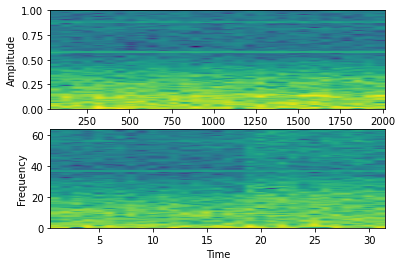

In [ ]:
plot.subplot(211)

#plot.plot(s1,s2)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(arr[0:4097], Fs=2.0,NFFT=256)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

 

# Plot the spectrogram

plot.subplot(212)

powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(arr[100000:104097], Fs=128.0)

plot.xlabel('Time')

plot.ylabel('Frequency')

In [ ]:
import cv2
hist = cv2.calcHist([spectogram_dataset[489]],[0],None,[256],[0,256])


# **Distributed Architecture**

In [ ]:

fig = plot.Figure(figsize=(12,10))
ax = fig.add_subplot(212)
canvas = FigureCanvas(fig)
canvas.draw()
#   # spectogram_dataset.append()
#   # Create a figure that pyplot does not know about.
# # fig = Figure()
# # attach a non-interactive Agg canvas to the figure
# # (as a side-effect of the ``__init__``)
# for i in range(0, len(lines), 4097):
#   fig = plot.Figure(figsize=(12,10))
#   canvas = FigureCanvas(fig)
#   ax = fig.add_subplot(212)
#   powerSpectrum, freqenciesFound, time, imageAxis = ax.specgram(lines[i:4097+i], Fs=128.0)
#   ax.set_xlabel('Time')
#   ax.set_label('Frequency')
#   canvas.draw()
#   X = np.array(canvas.renderer.buffer_rgba())  # grab the pixel buffer and dump it into a numpy array
#   spectogram_dataset.append(X)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=165).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=165).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:75: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=165).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:81: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=165).


Text(0, 0.5, 'Freq')

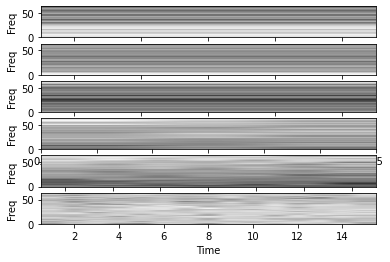

In [ ]:
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
a5 = []
coeffs = []
output_wavelet = []
split_dataset_a5 = []
split_dataset_d5 = []
split_dataset_d4 = []
split_dataset_d3 = []
split_dataset_d2 = [] 
test_a5  = []
test_d5 = []
test_d4 = []
test_d3 = []
test_d2 = []
# fig = plot.Figure(figsize=(12,10))
# canvas = FigureCanvas(fig)
# ax = fig.add_subplot(212)
for i in range(0,len(lines)):
  coeffs = pywt.wavedec(lines[i],'sym20',level=5)
  a5,d5,d4,d3,d2,d1 = coeffs
  a5 = a5.tolist()
  d5 = d5.tolist()
  d4 = d4.tolist()
  d3 = d3.tolist()
  d2 = d2.tolist()
  d1 = d1.tolist()
  powerSpectrum, freqenciesFound, time, imageAxis = ax.specgram(a5, Fs=128.0)
  # ax.set_xlabel('Time')
  # ax.set_label('Frequency')
  # canvas.draw()
  x_a5 = np.array(canvas.renderer.buffer_rgba())  # grab the pixel buffer and dump it into a numpy array
  if((i>=0 and i<34) or (i>=200 and i<233) or (i>=400 and i<433)):
    test_a5.append(np.resize(np.asarray(x_a5),(300,300,4)))
  else:
    split_dataset_a5.append(np.resize(np.asarray(x_a5),(300,300,4)))
  # test_a5.append(np.resize(np.asarray(x_a5),(300,300,4)))
  powerSpectrum, freqenciesFound, time, imageAxis = ax.specgram(d5, Fs=128.0)
  x_d5 = np.array(canvas.renderer.buffer_rgba())  # grab the pixel buffer and dump it into a numpy array
  if((i>=0 and i<34) or (i>=200 and i<233) or (i>=400 and i<433)):
    test_d5.append(np.resize(np.asarray(x_d5),(300,300,4)))
  else:
    split_dataset_d5.append(np.resize(np.asarray(x_d5),(300,300,4)))
  # test_d5.append(np.resize(np.asarray(x_d5),(300,300,4)))
  powerSpectrum, freqenciesFound, time, imageAxis = ax.specgram(d4, Fs=128.0)
  x_d4 = np.array(canvas.renderer.buffer_rgba())  # grab the pixel buffer and dump it into a numpy array
  if((i>=0 and i<34) or (i>=200 and i<233) or (i>=400 and i<433)):
    test_d4.append(np.resize(np.asarray(x_d4),(300,300,4)))
  else:
    split_dataset_d4.append(np.resize(np.asarray(x_d4),(300,300,4)))
  # test_d4.append(np.resize(np.asarray(x_d4),(300,300,4)))
  powerSpectrum, freqenciesFound, time, imageAxis = ax.specgram(d3, Fs=128.0)
  x_d3 = np.array(canvas.renderer.buffer_rgba())  # grab the pixel buffer and dump it into a numpy array
  if((i>=0 and i<34) or (i>=200 and i<233) or (i>=400 and i<433)):
    test_d3.append(np.resize(np.asarray(x_d3),(300,300,4)))
  else:  
    split_dataset_d3.append(np.resize(np.asarray(x_d3),(300,300,4)))
  # test_d3.append(np.resize(np.asarray(x_d3),(300,300,4)))
  powerSpectrum, freqenciesFound, time, imageAxis = ax.specgram(d2, Fs=128.0)
  x_d2 = np.array(canvas.renderer.buffer_rgba())  # grab the pixel buffer and dump it into a numpy array
  if((i>=0 and i<34) or (i>=200 and i<233) or (i>=400 and i<433)):
    test_d2.append(np.resize(np.asarray(x_d2),(300,300,4)))
  else:
    split_dataset_d2.append(np.resize(np.asarray(x_d2),(300,300,4)))
  # test_d2.append(np.resize(np.asarray(x_d2),(300,300,4)))

# test_a5 = split_dataset_a5[0:34]
# test_a5.append(split_dataset_d2[200:233])
# print(len(split_dataset_d2))
plot.subplot(611)
#plot.plot(s1,s2)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(d5, Fs=128.0)
plot.xlabel('Time')
plot.ylabel('Freq')


plot.subplot(612)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(a5, Fs=128.0)
plot.xlabel('Time')
plot.ylabel('Freq')

plot.subplot(613)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(d4, Fs=128.0)
plot.xlabel('Time')
plot.ylabel('Freq')

plot.subplot(614)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(d3, Fs=128.0)
plot.xlabel('Time')
plot.ylabel('Freq')

plot.subplot(615)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(d2, Fs=128.0)
plot.xlabel('Time')
plot.ylabel('Freq')

plot.subplot(616)
powerSpectrum, freqenciesFound, time, imageAxis = plot.specgram(d1, Fs=128.0)
plot.xlabel('Time')
plot.ylabel('Freq')

In [ ]:
#res = convolve2d(test_d3[0], sinGabor)
from skimage.filters import gabor,gaussian,hessian,laplace,prewitt 
img = prewitt(test_d5[0])
plt.imshow(img)

In [ ]:
print(type(test_a5[0]),len(test_a5),type(split_dataset_a5[0].shape),len(split_dataset_a5))

<class 'numpy.ndarray'> 100 <class 'numpy.ndarray'> 400


In [ ]:
y_test = [0]*34 + [1]*33 + [2] *33

y_train = [0]*166 + [1]*167 + [2]*67

print(len(y_test),len(y_train))
print(y_train)

100 400
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
test_a5 = np.array(test_a5)
test_d5 = np.array(test_d5)
test_d4 = np.array(test_d4)
test_d3 = np.array(test_d3)
test_d2 = np.array(test_d2)
split_dataset_a5 = np.array(split_dataset_a5)
split_dataset_d2 = np.array(split_dataset_d2)
split_dataset_d3 = np.array(split_dataset_d3)
split_dataset_d4 = np.array(split_dataset_d4)
split_dataset_d5 = np.array(split_dataset_d5)
y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)

In [ ]:
print(y_train.shape)
print(y_train)
print(split_dataset_a5.shape)

(400, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
(400, 300, 300, 4)


In [ ]:
print(split_dataset_a5.shape,test_a5.shape,y_train.shape)

(400, 300, 300, 4) (100, 300, 300, 4) (400, 3)


In [ ]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import plot_model
from keras.layers import Conv2D, Conv1D, MaxPooling2D, Reshape, Concatenate, Dropout , MaxPooling1D, Flatten


A1 = Input(shape=(300,300,4),name='A1')
A2 = Conv2D(32, kernel_size= 5 , strides=1, activation='relu',name='A2')(A1)
A2 = Conv2D(36, kernel_size= 5 , strides=1, activation='relu',name='A2.1')(A2)
A3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='A3')(A2)
A4 = Conv2D(50, kernel_size= 5 , strides=1, activation='relu',name='A4')(A3)
A4 = Conv2D(56, kernel_size= 5 , strides=1, activation='relu',name='A4.1')(A4)
A5 = Dense(5, activation='relu',name='A5')(A4)

B1 = Input(shape=(300,300,4),name='B1')
B2 = Conv2D(32, kernel_size= 5 , strides=1, activation='relu',name='B2')(B1)
B2 = Conv2D(36, kernel_size= 5 , strides=1, activation='relu',name='B2.1')(B2)
B3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='B3')(B2)
B4 = Conv2D(50, kernel_size= 5 , strides=1, activation='relu',name='B4')(B3)
B4 = Conv2D(56, kernel_size= 5 , strides=1, activation='relu',name='B4.1')(B4)
B5 = Dense(5, activation='relu',name='B5')(B4)

C1 = Input(shape=(300,300,4),name='C1')
C2 = Conv2D(32, kernel_size= 5 , strides=1, activation='relu',name='C2')(C1)
C2 = Conv2D(36, kernel_size= 5 , strides=1, activation='relu',name='C2.1')(C2)
C3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='C3')(C2)
C4 = Conv2D(50, kernel_size= 5 , strides=1, activation='relu',name='C4')(C3)
C4 = Conv2D(56, kernel_size= 5 , strides=1, activation='relu',name='C4.1')(C4)
C5 = Dense(5, activation='relu',name='C5')(C4)

D1 = Input(shape=(300,300,4),name='D1')
D2 = Conv2D(32, kernel_size= 5 , strides=1, activation='relu',name='D2')(D1)
D2 = Conv2D(36, kernel_size= 5 , strides=1, activation='relu',name='D2.1')(D2)
D3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='D3')(D2)
D4 = Conv2D(64, kernel_size= 5 , strides=1, activation='relu',name='D4')(D3)
D4 = Conv2D(56, kernel_size= 5 , strides=1, activation='relu',name='D4.1')(D4)
D5 = Dense(5, activation='relu',name='D5')(D4)

E1 = Input(shape=(300,300,4),name='E1')
E2 = Conv2D(32, kernel_size= 5 , strides=1, activation='relu',name='E2')(E1)
E2 = Conv2D(36, kernel_size= 5 , strides=1, activation='relu',name='E2.1')(E2)
E3 = MaxPooling2D(pool_size=(2, 2), strides=(2, 2),name='E3')(E2)
E4 = Conv2D(64, kernel_size= 5 , strides=1, activation='relu',name='E4')(E3)
E4 = Conv2D(56, kernel_size= 5 , strides=1, activation='relu',name='E4.1')(E4)
E5 = Dense(5, activation='relu',name='E5')(E4)



join = Concatenate(axis=-1)([A5, B5,C5,D5,E5])
join = Flatten()(join)
output = Dense(3, activation='softmax',name='output')(join)

merged = Model(inputs=[A1,B1,C1,D1,E1],outputs=[output])
plot_model(merged,to_file='demo.png',show_shapes=True)
merged.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



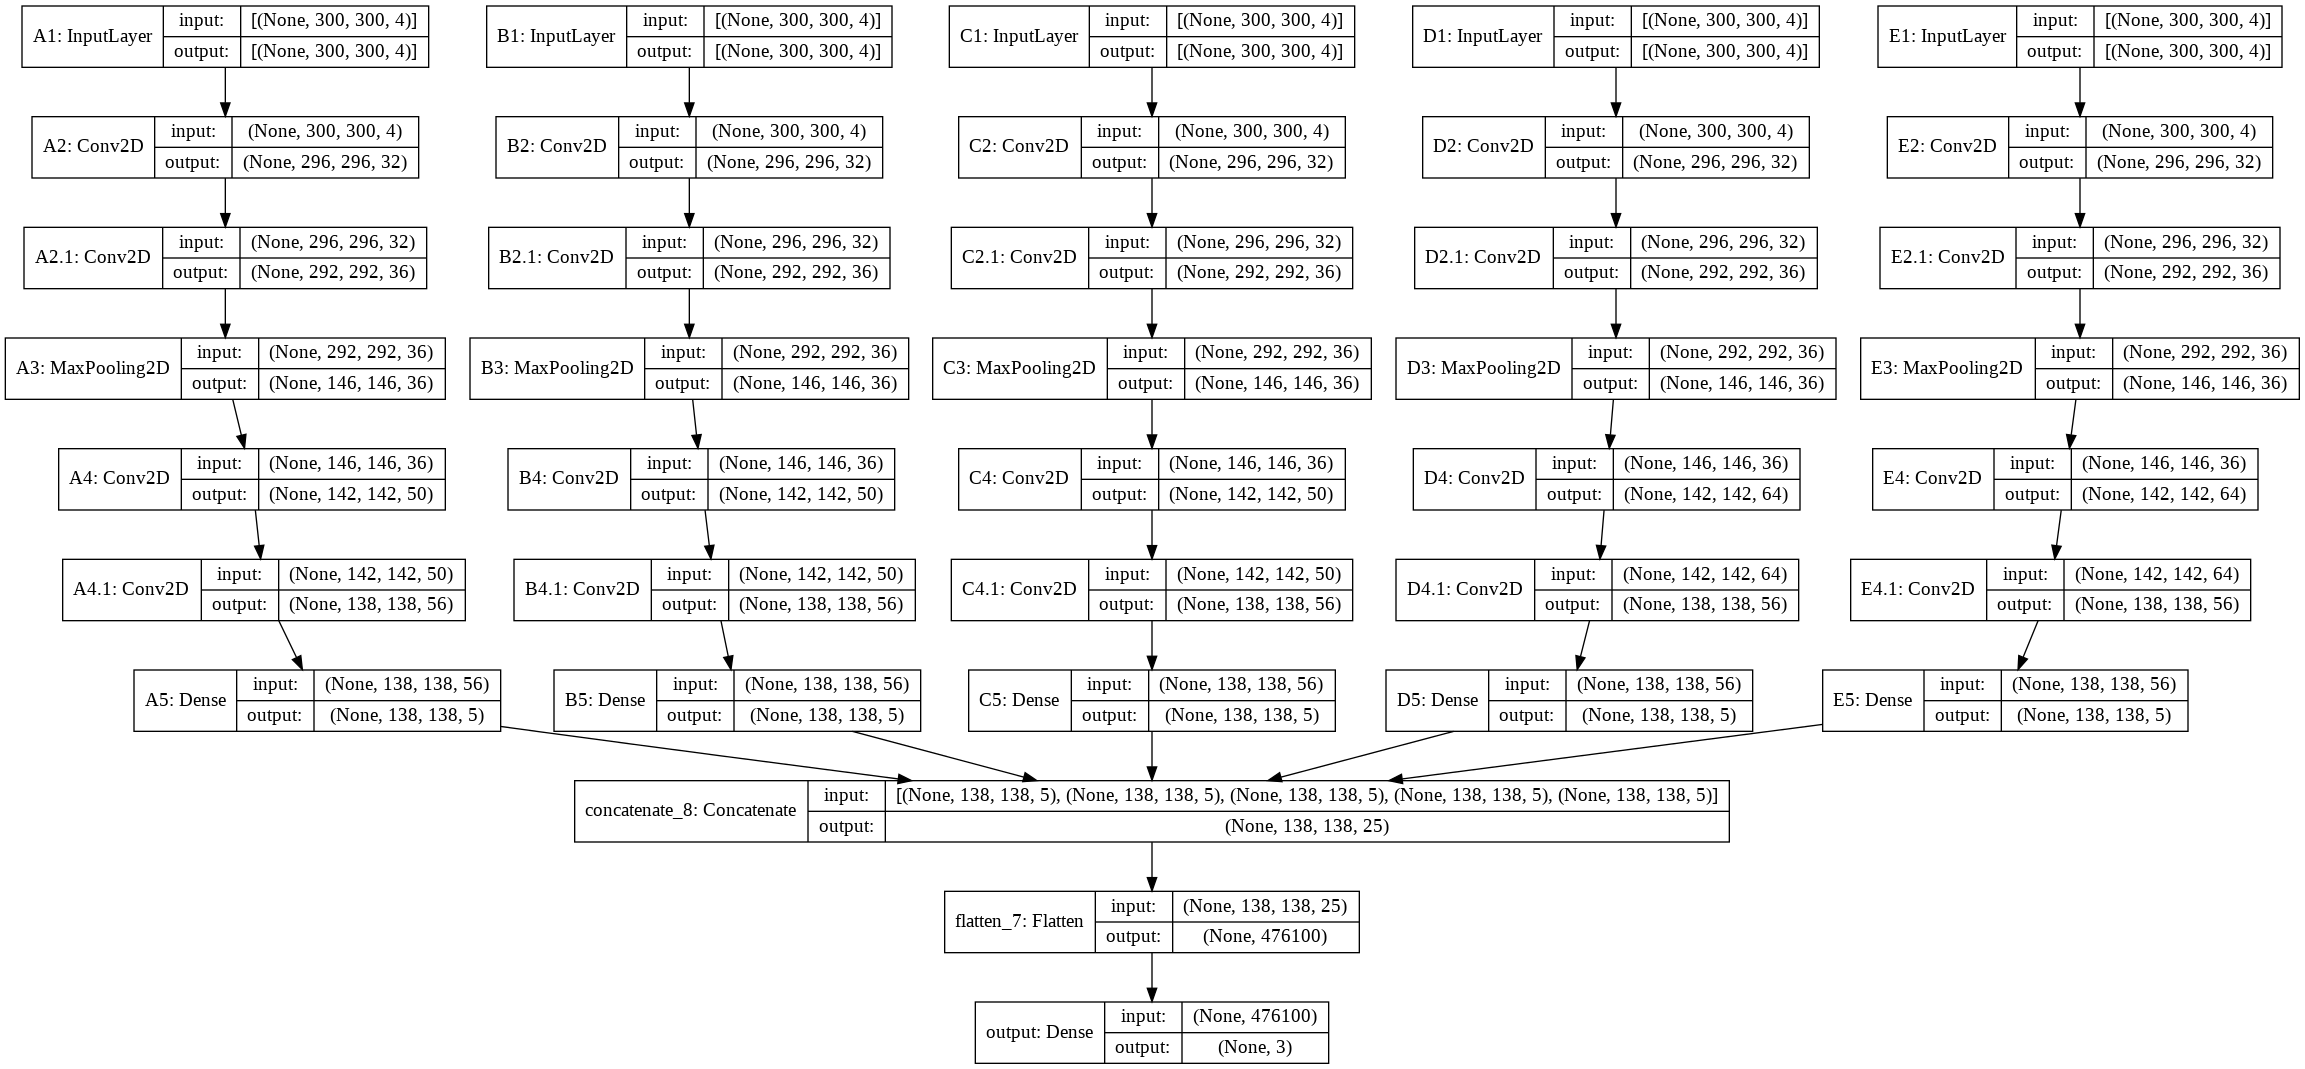

In [ ]:
plot_model(merged,to_file='/content/sample_data/demo.png',show_shapes=True)


In [ ]:
from sklearn.metrics import confusion_matrix
merged.fit([split_dataset_a5, split_dataset_d4,split_dataset_d5,split_dataset_d3,split_dataset_d2], y=y_train, batch_size=10, epochs=100,#split_dataset_d2,split_dataset_d3,
             verbose=1, shuffle=True) 

# model.fit(x_train, y_train,
#           batch_size=batch_size,
#           epochs=200,
#           verbose=1,
#           validation_data=(x_val, y_val))#,callbacks=[es])
scores = merged.evaluate([test_a5,test_d4,test_d5,test_d3,test_d2], y_test, verbose=0)#,test_d2,test_d3,
y_pred = merged.predict([test_a5,test_d4,test_d5,test_d3,test_d2])
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Matrix:", matrix)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Epoch 1/100
40/40 [==============================] - 24s 497ms/step - loss: 1.0901 - accuracy: 0.3850
Epoch 2/100
40/40 [==============================] - 20s 502ms/step - loss: 1.0837 - accuracy: 0.4125
Epoch 3/100
40/40 [==============================] - 20s 497ms/step - loss: 1.0778 - accuracy: 0.3775
Epoch 4/100
40/40 [==============================] - 20s 494ms/step - loss: 1.0722 - accuracy: 0.3800
Epoch 5/100
40/40 [==============================] - 20s 496ms/step - loss: 1.0675 - accuracy: 0.3750
Epoch 6/100
40/40 [==============================] - 20s 498ms/step - loss: 1.0631 - accuracy: 0.3825
Epoch 7/100
40/40 [==============================] - 20s 498ms/step - loss: 1.0593 - accuracy: 0.4075
Epoch 8/100
40/40 [==============================] - 20s 496ms/step - loss: 1.0558 - accuracy: 0.3925
Epoch 9/100
40/40 [==============================] - 20s 495ms/step - loss: 1.0528 - accuracy: 0.4050
Epoch 10/100
40/40 [==============================] - 20s 497ms/step - loss: 1.050

In [ ]:
model_final.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
from keras.utils import plot_model
plot_model(model_final, to_file='model_final.png')

# **LeNet**

In [ ]:
y = [0]*200 + [1]*200 + [2]*100

x_train, x_test, y_train, y_test = train_test_split(spectogram_dataset_numpy, y, test_size=0.2, random_state=42)
print(len(x_train),len(x_test))
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)
print(len(x_train[0]),len(x_val),len(x_test),len(y_train),len(y_test))

y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)

y_train = to_categorical(y_train,3)
y_test = to_categorical(y_test,3)
y_val = to_categorical(y_val,3)

x_train = np.array(x_train)
x_test = np.array(x_test)
x_val = np.array(x_val)

400 100
720 40 100 360 100


In [ ]:
(x_train).shape

(360, 720, 864, 4)

In [ ]:
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(720,864,4)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(units=84, activation='relu'))
model.add(Dropout(0.5))
model.add(layers.Dense(units=3, activation='relu'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 718, 862, 6)       222       
_________________________________________________________________
average_pooling2d_6 (Average (None, 359, 431, 6)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 357, 429, 16)      880       
_________________________________________________________________
average_pooling2d_7 (Average (None, 178, 214, 16)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 609472)            0         
_________________________________________________________________
dense_9 (Dense)              (None, 120)               73136760  
_________________________________________________________________
dropout_6 (Dropout)          (None, 120)              

In [ ]:
#HAMZA's LeNET Run:
#USE this to run ENSEMBLE MODEL, since this saves the weights of the code.
max_accuracy = 0.85
n_epochs = 200
# model = load_model('models/model_LeNet5'+"max_accuracy" + '.h5')
for i in range(n_epochs):
	# fit model for a single epoch
  print("Epoch "+ str(i))
  history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          verbose=1,
          validation_data=(x_test, y_test))#,callbacks=[es])
	# check if we should save the model
  x = history.history['val_accuracy']
  x = float(x[0])
  if  x > max_accuracy:
    print("Write to File")
    model.save('models/model_LeNet5'+"max_accuracy" + '.h5')
    max_accuracy = x

In [ ]:
##dummy one

model.fit(x_train, y_train,
          batch_size=10,
          epochs=100,
          verbose=1,
          validation_data=(x_val, y_val))

scores = model.evaluate(x_test, y_test, verbose=0)#,test_d2,test_d3,
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


Epoch 1/100
36/36 [==============================] - 3s 73ms/step - loss: nan - accuracy: 0.3802 - val_loss: 3.4256 - val_accuracy: 0.3750
Epoch 2/100
36/36 [==============================] - 2s 67ms/step - loss: 2.9733 - accuracy: 0.3956 - val_loss: 1.0358 - val_accuracy: 0.4500
Epoch 3/100
36/36 [==============================] - 2s 68ms/step - loss: 1.9091 - accuracy: 0.4451 - val_loss: 1.0360 - val_accuracy: 0.4500
Epoch 4/100
36/36 [==============================] - 2s 69ms/step - loss: 1.2448 - accuracy: 0.4306 - val_loss: 1.0408 - val_accuracy: 0.3750
Epoch 5/100
36/36 [==============================] - 2s 68ms/step - loss: 1.4620 - accuracy: 0.4075 - val_loss: 1.0739 - val_accuracy: 0.3750
Epoch 6/100
36/36 [==============================] - 2s 69ms/step - loss: 1.2313 - accuracy: 0.3703 - val_loss: 1.0663 - val_accuracy: 0.3750
Epoch 7/100
36/36 [==============================] - 2s 68ms/step - loss: 1.1587 - accuracy: 0.4049 - val_loss: 1.0594 - val_accuracy: 0.3750
Epoch 8/1

In [ ]:
#Rohan test model

model.fit(x_train, y_train,
          batch_size=10,
          epochs=100,
          verbose=1,
          validation_data=(x_val, y_val))

scores = model.evaluate(x_test, y_test, verbose=0)#,test_d2,test_d3,
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])
y_pred = model.predict(x_test)
matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Matrix:", matrix)


Epoch 1/100
36/36 [==============================] - 3s 73ms/step - loss: 0.1803 - accuracy: 0.9778 - val_loss: 0.8059 - val_accuracy: 0.9500
Epoch 2/100
36/36 [==============================] - 2s 69ms/step - loss: 0.0314 - accuracy: 0.9917 - val_loss: 0.4553 - val_accuracy: 0.9500
Epoch 3/100
36/36 [==============================] - 3s 70ms/step - loss: 0.2219 - accuracy: 0.9806 - val_loss: 0.4179 - val_accuracy: 0.9750
Epoch 4/100
36/36 [==============================] - 2s 69ms/step - loss: 0.1778 - accuracy: 0.9778 - val_loss: 0.4144 - val_accuracy: 0.9750
Epoch 5/100
36/36 [==============================] - 3s 71ms/step - loss: 0.1716 - accuracy: 0.9611 - val_loss: 0.4139 - val_accuracy: 0.9750
Epoch 6/100
36/36 [==============================] - 2s 69ms/step - loss: 0.2209 - accuracy: 0.9778 - val_loss: 0.4030 - val_accuracy: 0.9750
Epoch 7/100
36/36 [==============================] - 3s 71ms/step - loss: 0.1092 - accuracy: 0.9889 - val_loss: 0.4030 - val_accuracy: 0.9750
Epoch 

In [ ]:
first = Sequential()
first.add(Conv2D(32, kernel_size=(3, 1),
                 activation='relu',
                 input_shape = (129,1,1)))
first.add(Flatten())
second = Sequential()
second.add(Conv2D(32, kernel_size=(3, 1),
                 activation='relu',
                 input_shape = (129,1,1)))
third = Sequential()
# of course you must provide the input to result which will be your x3
third.add(Conv2D(32, kernel_size=(3, 1),
                 activation='relu',
                 input_shape = (129,1,1)))
third.add(Flatten())

# lets say you add a few more layers to first and second.
# concatenate them
merged = Concatenate([first, second,third])

# then concatenate the two outputs

#result = Concatenate([merged,  third])

#ada_grad = Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
#output = Dense(3, activation='softmax')(merged)
#final = Sequential()
merged = (Dense(9 , activation='relu'))(merged)

final.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# Ensemble

In order to run this:
1. LeNet, RNN, CNN sections must be run
2. model weights must be saved

if you want the pre-saved weights used in our experiment contact:

Mian Hamza, mian.hamza@mail.mcgill.ca

In [ ]:
x_train, x_test, x_val, y_train, y_test, y_val = get_data('lines')

400 100
4097 40 100 360 100
360
x_train shape: (360, 4097, 1, 1)
360 train samples
100 test samples
<class 'numpy.ndarray'>
360


In [ ]:
print( os.listdir('models') )

['model_RNN1max_accuracy.h5', 'model_CNN1max_accuracy.h5', 'model_LeNet5max_accuracy.h5', 'model_CNN12max_accuracy.h5']


In [ ]:
filename = 'models/model_RNN1' + 'max_accuracy' + '.h5'
RNN_model = load_model(filename)

In [ ]:
filename = ('models/model_CNN1'+'max_accuracy' + '.h5')
CNN_model = load_model(filename)

In [ ]:
filename = ('models/model_LeNet5'+'max_accuracy' + '.h5')
LENET_model = load_model(filename)

In [ ]:
def convert_votes(a): #Can be used to convert probability distribution to 1 for true class and 0 for other classes.
  return (a == a.max(axis=1)[:,None]).astype(int)

In [ ]:
len(x_val)

40

In [ ]:
models = [RNN_model, CNN_model, LENET_model]

In [ ]:
result_ensemble = np.argmax(yhats, axis = 1)
print("____________")
print(accuracy_score(y_test, result_ensemble))

____________
0.72
[1 0 1 0 0 1 1 1 0 2 1 0 2 0 1 1 0 1 1 2 2 2 1 1 0 2 2 1 0 1 2 0 2 0 1 1 2
 0 1 0 1 1 2 1 0 0 0 0 1 0 1 1 0 2 0 0 1 1 2 0 0 1 0 0 1 1 2 1 1 1 1 1 0 1
 1 1 1 1 2 2 1 1 0 0 1 0 0 2 1 1 1 2 1 1 2 0 0 1 0 0]


In [ ]:
LE_VAL = np.array(create_spectogram_dataset(x_test, 'numpy'))

<class 'numpy.ndarray'>


In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
def ensemble(input_data, input_labels):
  yhats_RNN = RNN_model.predict((input_data.squeeze(3)), batch_size=10)
  yhats_CNN = CNN_model.predict(input_data, batch_size=10)
  yhats_LENET = LENET_model.predict(np.array(create_spectogram_dataset(input_data, 'numpy')) ,  batch_size=10)
  yhats_LENET = softmax(yhats_LENET, axis = 1)
  # yhats_CNN = convert_votes(yhats_CNN)
  # yhats_RNN = convert_votes(yhats_RNN)
  yhats = np.array(yhats_CNN+ yhats_RNN + yhats_LENET)
  # print(yhats)

  # argmax across classes
  result_ensemble = np.argmax(yhats, axis=1)
  ensemble_accuracy = accuracy_score(np.argmax(input_labels, axis =1), result_ensemble)
  # print(ensemble_accuracy)
  return ensemble_accuracy

In [ ]:
ensemble(x_test, y_test)

<class 'numpy.ndarray'>


0.94

In [ ]:
ensemble(x_val, y_val)

<class 'numpy.ndarray'>


1.0

In [ ]:
yhats_RNN = RNN_model.predict((x_test.squeeze(3)), batch_size=10)
result_RNN = np.argmax(yhats_RNN, axis=1)
RNN_accuracy = accuracy_score(np.argmax(y_test, axis =1), result_RNN)
RNN_accuracy

0.9

In [ ]:
yhats_CNN = CNN_model.predict(x_test, batch_size=10)
result_CNN = np.argmax(yhats_CNN, axis=1)
CNN_accuracy = accuracy_score(np.argmax(y_test, axis =1), result_CNN)
CNN_accuracy

0.9

In [ ]:
yhats_LENET = LENET_model.predict(LE_VAL, batch_size=10)
result_LENET = np.argmax(yhats_LENET, axis=1)
LENET_accuracy = accuracy_score(np.argmax(y_test, axis =1), result_LENET)
LENET_accuracy

0.94

In [ ]:
softmax(yhats_LENET, axis=1)

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
yhats = (yhats_CNN+ yhats_RNN)
print(yhats/2)
print("____________")
print(yhats_RNN)